In [70]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, silhouette_score

In [71]:
dataset=pd.read_csv('HR_comma_sep.csv')

In [72]:
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [74]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [75]:
dataset.shape

(14999, 10)

univarient analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'technical'),
  Text(2, 0, 'support'),
  Text(3, 0, 'IT'),
  Text(4, 0, 'product_mng'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'RandD'),
  Text(7, 0, 'accounting'),
  Text(8, 0, 'hr'),
  Text(9, 0, 'management')])

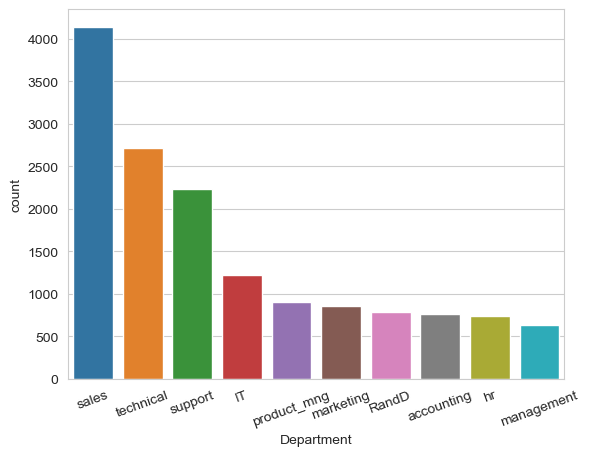

In [76]:
sns.countplot(x='Department',data=dataset,order=dataset['Department'].value_counts().index)
plt.xticks(rotation=20)

In [78]:
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


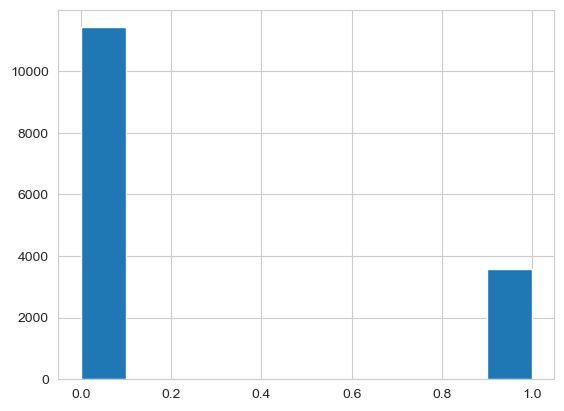

In [77]:
plt.hist(data=dataset, x='left', bins=10)

plt.show()

Bivarient analysis

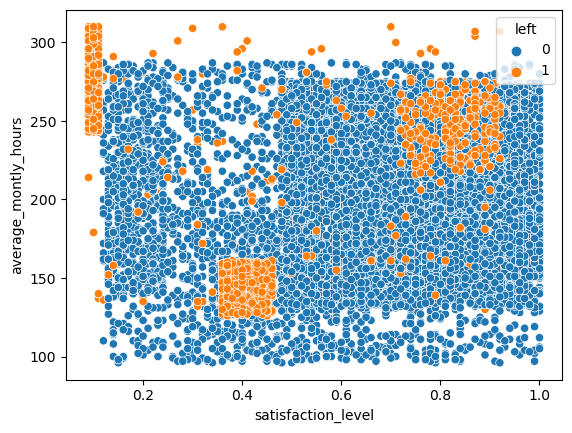

In [ ]:
sns.scatterplot(x=dataset['satisfaction_level'],y=dataset['average_montly_hours'],hue=dataset['left'])
plt.show()

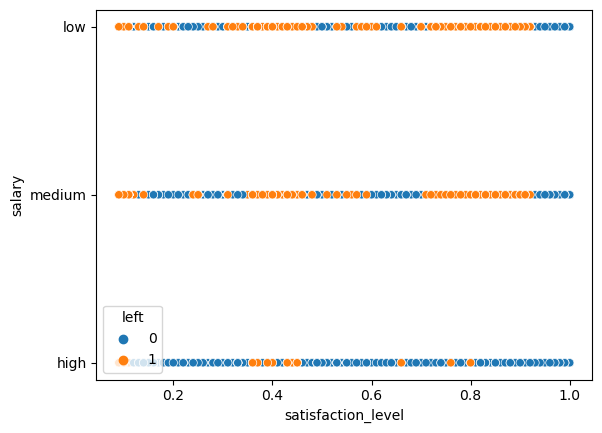

In [29]:
sns.scatterplot(x=dataset['satisfaction_level'],y=dataset['salary'],hue=dataset['left'])
plt.show()

C:\Users\Naseeha\AppData\Local\Temp\ipykernel_13476\181810581.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='satisfaction_level',y='left',ci=None)


<Axes: xlabel='satisfaction_level', ylabel='left'>

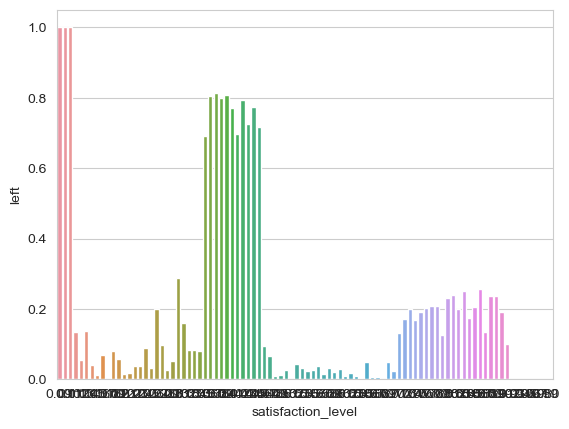

In [80]:
sns.barplot(data=dataset, x='satisfaction_level',y='left',ci=None)


C:\Users\Naseeha\for anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


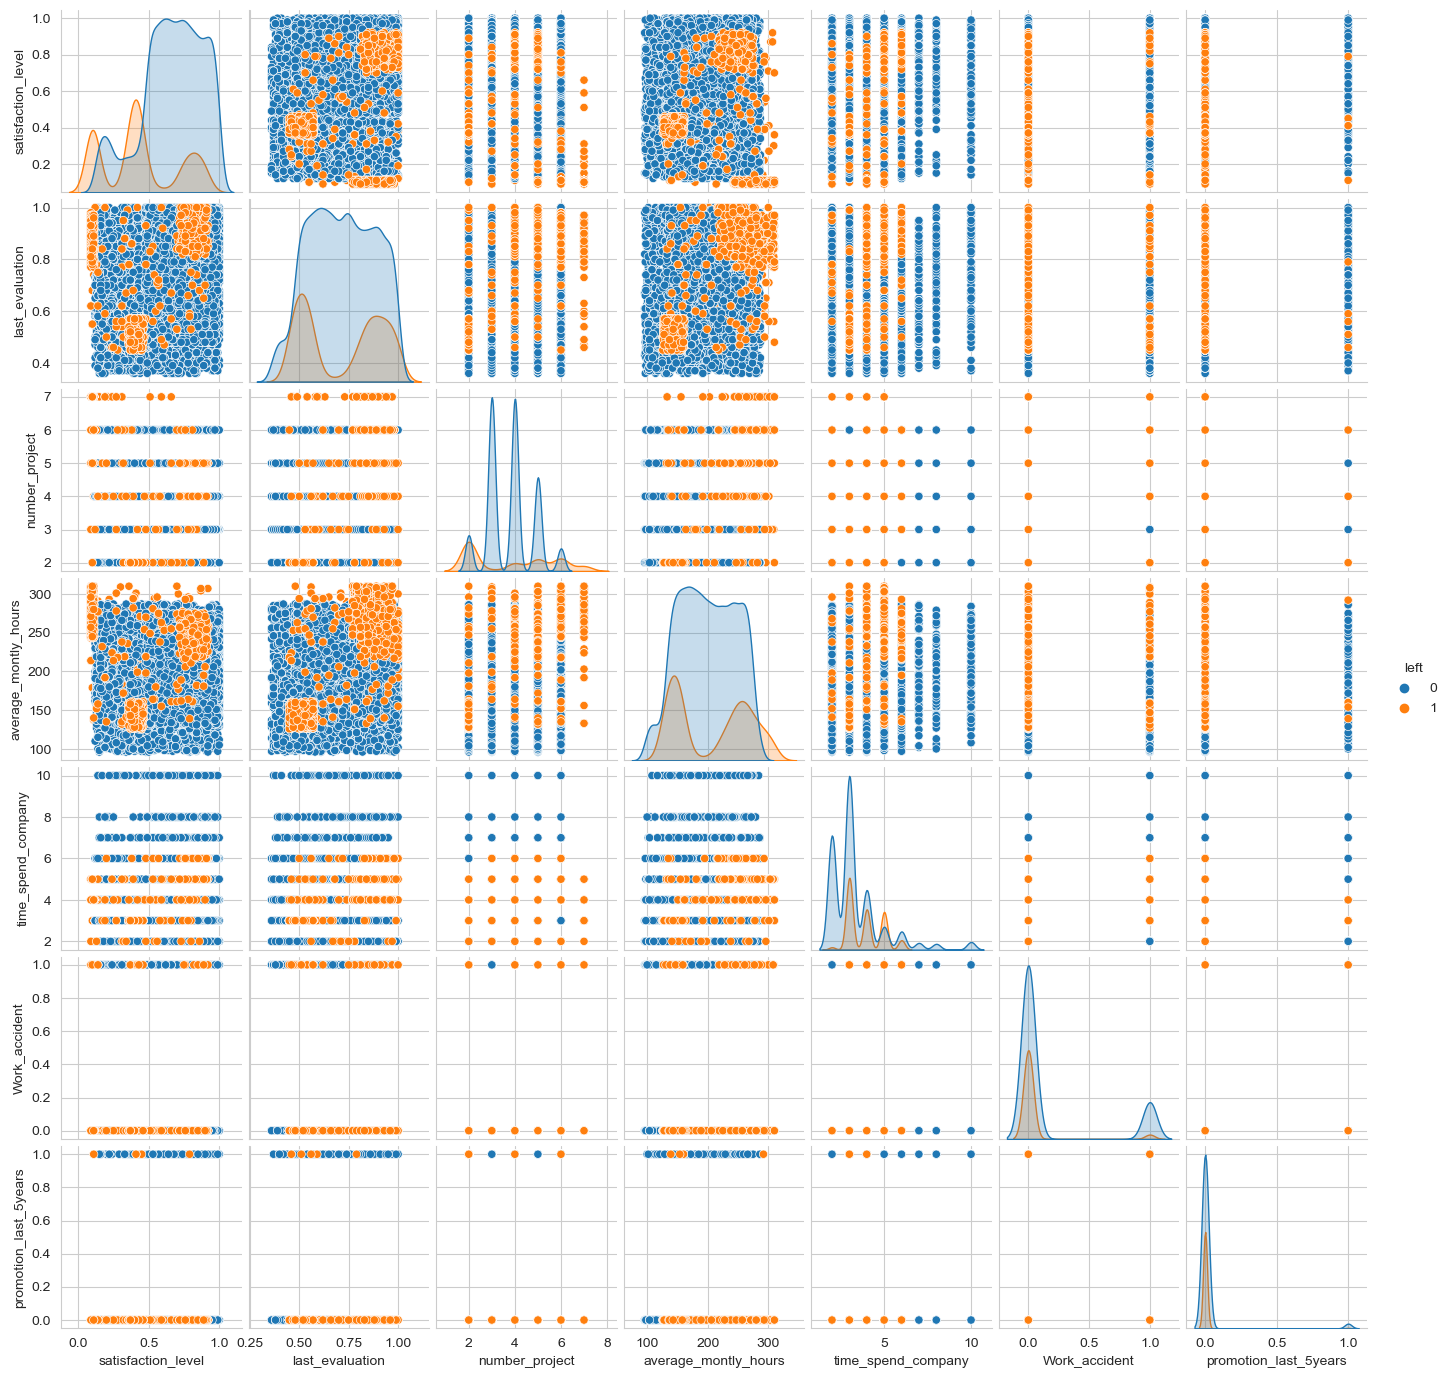

In [82]:
sns.set_style("whitegrid")
sns.pairplot(dataset, hue="left",height=2)
plt.show()

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.show()


NameError: name 'corr_matrix' is not defined

<Figure size 1000x600 with 0 Axes>

C:\Users\Naseeha\AppData\Local\Temp\ipykernel_13476\4368662.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='number_project',y='left',ci=None)


<Axes: xlabel='number_project', ylabel='left'>

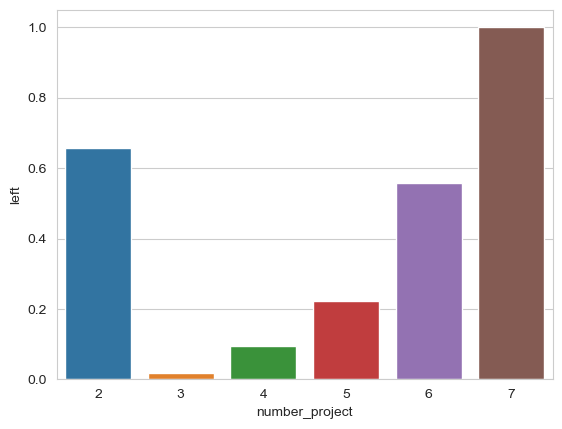

In [83]:
sns.barplot(data=dataset, x='number_project',y='left',ci=None)

C:\Users\Naseeha\AppData\Local\Temp\ipykernel_13476\1928479992.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='number_project',y='satisfaction_level',ci=None)


<Axes: xlabel='number_project', ylabel='satisfaction_level'>

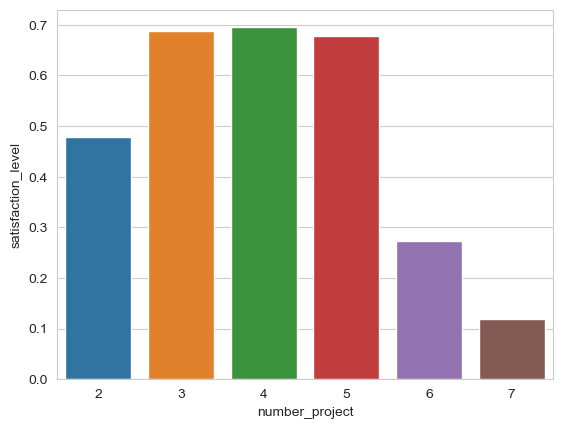

In [38]:
sns.barplot(data=dataset, x='number_project',y='satisfaction_level',ci=None)

In [86]:
ds1=dataset

In [91]:
ds1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0
14995,0.37,0.48,2,160,3,0,1,0,support,0
14996,0.37,0.53,2,143,3,0,1,0,support,0
14997,0.11,0.96,6,280,4,0,1,0,support,0


In [92]:
ds1.describe

<bound method NDFrame.describe of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2    

In [94]:
ds2 = ds1.drop(['Department'], axis=1)

In [95]:
ds2



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0
14995,0.37,0.48,2,160,3,0,1,0,0
14996,0.37,0.53,2,143,3,0,1,0,0
14997,0.11,0.96,6,280,4,0,1,0,0


array(['low', 'medium', 'high'], dtype=object)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0
14995,0.37,0.48,2,160,3,0,1,0,support,0
14996,0.37,0.53,2,143,3,0,1,0,support,0
14997,0.11,0.96,6,280,4,0,1,0,support,0


In [96]:
ds2.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


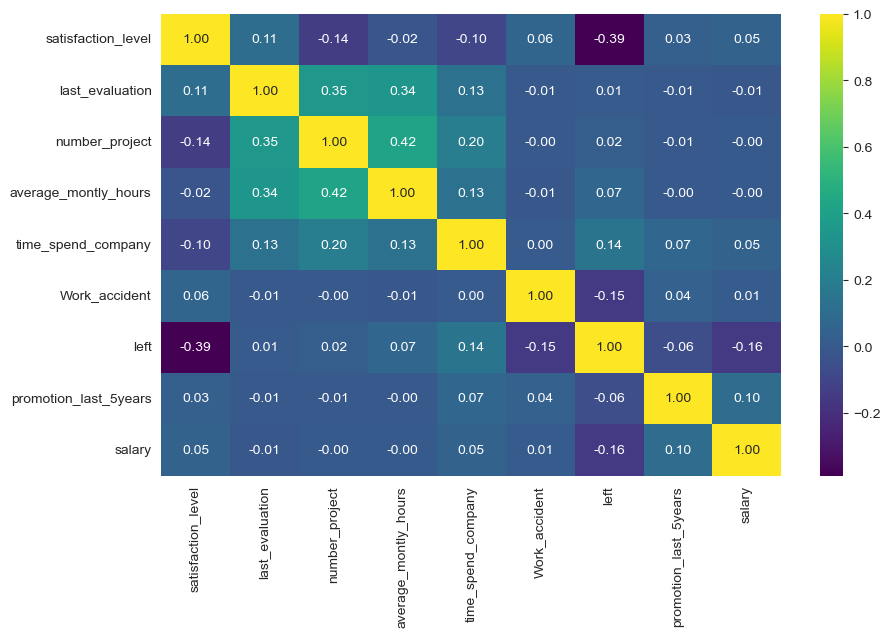

In [98]:
plt.figure(figsize=(10,6))
sns.heatmap(ds2.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.show()


In [99]:
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0
14995,0.37,0.48,2,160,3,0,1,0,support,0
14996,0.37,0.53,2,143,3,0,1,0,support,0
14997,0.11,0.96,6,280,4,0,1,0,support,0


In [101]:
columns=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','Department','salary','left']

In [102]:
dataset=dataset[columns]

In [103]:
dataset


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,0,1
1,0.80,0.86,5,262,6,0,0,sales,1,1
2,0.11,0.88,7,272,4,0,0,sales,1,1
3,0.72,0.87,5,223,5,0,0,sales,0,1
4,0.37,0.52,2,159,3,0,0,sales,0,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,0,1
14995,0.37,0.48,2,160,3,0,0,support,0,1
14996,0.37,0.53,2,143,3,0,0,support,0,1
14997,0.11,0.96,6,280,4,0,0,support,0,1


In [119]:
dataset['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [123]:
prof = {'sales': 0, 'accounting': 1, 'hr': 2, 'technical': 3, 'support':4, 'management':5,
       'IT':6, 'product_mng':7, 'marketing':8, 'RandD':9}
dataset['Department'] = dataset['Department'].map(prof)

In [124]:
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,0.53,2,157,3,0,0,0,0,1
1,0.80,0.86,5,262,6,0,0,0,1,1
2,0.11,0.88,7,272,4,0,0,0,1,1
3,0.72,0.87,5,223,5,0,0,0,0,1
4,0.37,0.52,2,159,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,4,0,1
14995,0.37,0.48,2,160,3,0,0,4,0,1
14996,0.37,0.53,2,143,3,0,0,4,0,1
14997,0.11,0.96,6,280,4,0,0,4,0,1


data modelling and evaluation

In [125]:
x = dataset.iloc[:,0:9].values
y = dataset.iloc[:,9].values

In [126]:
x

array([[0.38, 0.53, 2.  , ..., 0.  , 0.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 4.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 4.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 4.  , 0.  ]])

In [127]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [129]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (10499, 9)
y_train:  (10499,)
x_test:  (4500, 9)
y_test:  (4500,)


Logistic Regression

In [130]:
model_lr = LogisticRegression(max_iter = 600)

In [131]:
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=600)

In [134]:
y_pred_lr = model_lr.predict(x_test)

In [135]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.7933333333333333


K Nearest Neighbors Classifier

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
model_knn = KNeighborsClassifier()

In [138]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [139]:
y_pred_knn = model_knn.predict(x_test)

In [140]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.9231111111111111


Decision Tree Classifier

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
model_dt = DecisionTreeClassifier()

In [145]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [146]:
y_pred_dt = model_dt.predict(x_test)

In [147]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.9777777777777777


Naive Bayes Classifier

In [148]:
from sklearn.naive_bayes import GaussianNB

In [149]:
model_nb = GaussianNB()

In [150]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [151]:
y_pred_nb = model_nb.predict(x_test)

In [152]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.7737777777777778


Random Forest Classifier

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [155]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [156]:
y_pred_rf = model_nb.predict(x_test)

In [159]:
print("Accuracy : ", accuracy_score(y_test, y_pred_rf))

Accuracy :  0.7737777777777778


Prediction

In [162]:
Xnew = [[.38,.5,5,160,6,0,1,2,1]]

ynew = model_dt.predict(Xnew)

print(ynew)
      

[0]
